# Project : Customers Churn Prediction

**Goals** :
- The company wants to predict potential customers to stop using the products/ services offered, to minimize the risk of losing customers.

## 1. Import Libraries

In [ ]:
!pip install phik
!pip install feature_engine
!pip install tensorflow
! pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation
import phik

# multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

# saving
import joblib

import warnings
warnings.filterwarnings(action='ignore')

## 2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/.../data.csv')
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [ ]:
# missing_values = ["n/a",
#                   "na",
#                   "--",
#                   "?",
#                   "nan",
#                   "no",
#                   " ?",
#                   "NaN",
#                   "nan"]

In [ ]:
df = data.copy()
pd.set_option('display.max.columns', None)
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


## 3. Data Preprocessing

### 3.1. Data Duplicate

In [ ]:
df.duplicated().sum()

18

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

### 3.2. Date Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

In [ ]:
# change the data type of `joining_date` to be datetime
df['joining_date'] = pd.to_datetime(df['joining_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

### 3.3. Missing Value

In [ ]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Missing values ​​were found in the following variables:
- `gender` = 59
- `region_category` = 5428
- `joined_through_referral` = 5438
- `preferred_offer_types` = 288
- `medium_of_operation` = 5393

In [ ]:
# the percentage of each missing value
for i in df.columns:
  if df[i].isnull().sum()>0:
    print('The percentage of missing values ​​from',i,'=',round(df[i].isnull().sum()*100/df.shape[0],2),"%")

The percentage of missing values ​​from gender = 0.16 %
The percentage of missing values ​​from region_category = 14.67 %
The percentage of missing values ​​from joined_through_referral = 14.7 %
The percentage of missing values ​​from preferred_offer_types = 0.78 %
The percentage of missing values ​​from medium_of_operation = 14.58 %


Things to do to handle missing values:
- For the variables with the percentage of missing values < 5% will be removed = `gender` and `preferred_offer_types`.
- For the variables with the percentage of missing values > 5% -> the missing values ​​will be replaced with the mode (because the data type is categorical) (`region_category`,`joined_through_referral` and `medium_of_operation`).
- For the variables with the percentage of missing values > 5%, according to my assumption, is MCAR (Missing Completely At Random).

In [ ]:
# handling missing value < 5%
df.dropna(subset=['gender','preferred_offer_types'], inplace=True)

In [ ]:
# handling missing value > 5% with mode
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])

In [ ]:
# recheck missing value
df.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(36646, 22)

In [ ]:
# Data Transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36646.0,37.115511,15.871279,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36646.0,-41.955957,228.913891,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36646.0,279.118857,329.850217,0.00,60.0875,161.770,356.3525,3235.578521
avg_transaction_value,36646.0,29276.226579,19448.891993,800.46,14177.8350,27563.715,40860.4375,99914.050000
avg_frequency_login_days,36646.0,14.655780,9.471645,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36646.0,623.646095,270.163457,0.00,574.2125,680.415,757.0375,2069.069761
churn_risk_score,36646.0,0.541041,0.498320,0.00,0.0000,1.000,1.0000,1.000000


Insight from the average value of numerical variables:
- `age` (age of the user who made the transaction)=  37 years old
- `avg_time_spent` (the average time a user spends on the application) = 279 minutes
- `avg_transaction_value` (the average transaction spent by the user) = 29276.227 dollar
- `avg_frequency_login_days` (the average number of users logged in) = 14
- `points_in_wallet` (the average point that the user gets) = 623 point

Found outlier values:
- `days_since_last_login` (the length of time a user will log back into the website from their last login) = negative value

### 4.1 Investigate the negative value of `days_since_last_login`

In [ ]:
df.days_since_last_login.unique()

array([   4,   11,    8,   10,    9,   20,    3,    5,    2,   14,   12,
         19,   17,    7,   15,    6,   22,   16,   13,   18,   25, -999,
         24,   23,    1,   21,   26])

Found a strange value in the variable `days_since_last_login` , which is = `-999` .

After investigation, it turned out that for data with:
- `churn_risk_score` = `1` there are `1102` data (`days_since_last_login` = `-999`) and
- `churn_risk_score` = `0` there are `880` data (`days_since_last_login` = `-999`).

In [ ]:
df[df['days_since_last_login']==-999]['churn_risk_score'].value_counts()

1    1102
0     880
Name: churn_risk_score, dtype: int64

In [ ]:
df[df['days_since_last_login']==-999].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1982.0,37.393037,16.015780,10.00,23.000,38.000,51.0000,64.000000
days_since_last_login,1982.0,-999.000000,0.000000,-999.00,-999.000,-999.000,-999.0000,-999.000000
avg_time_spent,1982.0,275.672582,319.696165,0.00,60.665,165.780,349.6825,2341.451934
avg_transaction_value,1982.0,28931.609006,19468.447091,840.34,13787.630,27176.575,40401.7100,99530.860000
avg_frequency_login_days,1982.0,14.702105,9.390537,0.00,8.000,14.000,22.0000,73.061995
points_in_wallet,1982.0,624.114301,263.741770,0.00,565.495,673.110,753.7000,1755.094693
churn_risk_score,1982.0,0.556004,0.496979,0.00,0.000,1.000,1.0000,1.000000


After analysis, all of the data has nothing unusual (normal), so this data (`days_since_last_login` = `-999`) will not be changed, and later the correlation will also be seen whether this feature can be used or not.

### 4.2 Make Numerical and Categorical Data for EDA

In [ ]:
# create a variable list with numeric data type (for eda)
numlist_eda = ['age',
               'days_since_last_login',
               'avg_time_spent',
               'avg_transaction_value',
               'avg_frequency_login_days',
               'points_in_wallet']

# create a variable list with categorical data type (for eda)
catlist_eda = ['user_id',
               'gender',
               'region_category',
               'membership_category',
               'joining_date',
               'joined_through_referral',
               'preferred_offer_types',
               'medium_of_operation',
               'internet_option',
               'last_visit_time',
               'used_special_discount',
               'offer_application_preference',
               'past_complaint',
               'complaint_status',
               'feedback']

In [ ]:
# describe categorical feature
df[catlist_eda].describe().T

,count,unique,top,freq,first,last
user_id,36646,36646,9f420209e7d129f3,1,NaT,NaT
gender,36646,2,F,18348,NaT,NaT
region_category,36646,3,Town,19367,NaT,NaT
membership_category,36646,6,Basic Membership,7648,NaT,NaT
joining_date,36646,1096,2015-06-02 00:00:00,55,2015-01-01,2017-12-31
joined_through_referral,36646,2,No,21093,NaT,NaT
preferred_offer_types,36646,3,Gift Vouchers/Coupons,12322,NaT,NaT
medium_of_operation,36646,3,Desktop,19120,NaT,NaT
internet_option,36646,3,Wi-Fi,12290,NaT,NaT
last_visit_time,36646,29876,07:56:41,6,NaT,NaT


Based on the description of the data (categorical) above, several findings were found, including:

- The user `gender` with most transactions = `F`,
- The most users live in = `Town`
- The average user is still = `basic membership`
- The most frequent `feedback` is = `Poor Product Quality` / Poor Product Quality, affecting whether a user can stop a transaction.

### 4.3 The comparison number of users based on the `churn_risk_score`

[Text(0, 0, '16819'), Text(0, 0, '19827')]

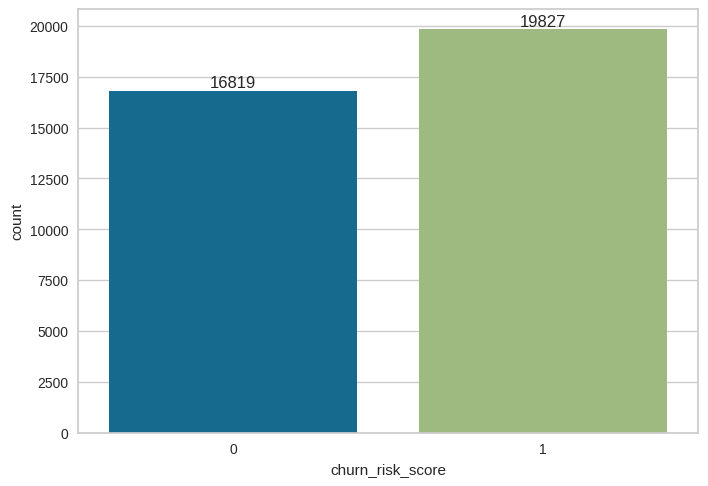

In [ ]:
a = sns.countplot(data=df,
                  x='churn_risk_score')
a.bar_label(a.containers[0])

Explanation:
- 0 = Not Churn (Not Stop)
- 1 = Churn (Stop)

Based on the bar chart above: the number of users who `churn` or `1` (stop using the product) = `19827` , which is more than the number of users who still use the product / `not churn` or `0` = `16819`.

<Axes: ylabel='churn_risk_score'>

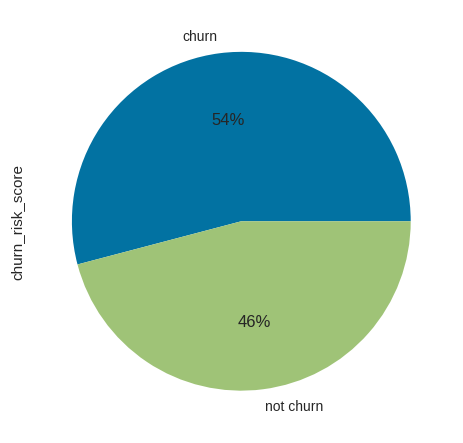

In [ ]:
# percentage difference between churn and not churn
df.churn_risk_score.value_counts().plot(kind='pie',
                                        autopct='%0.0f%%',
                                        labels=['churn','not churn'])

### 4.4 The comparison of numerical variables based on `churn_risk_score`





Text(0.5, 1.0, 'points_in_wallet')

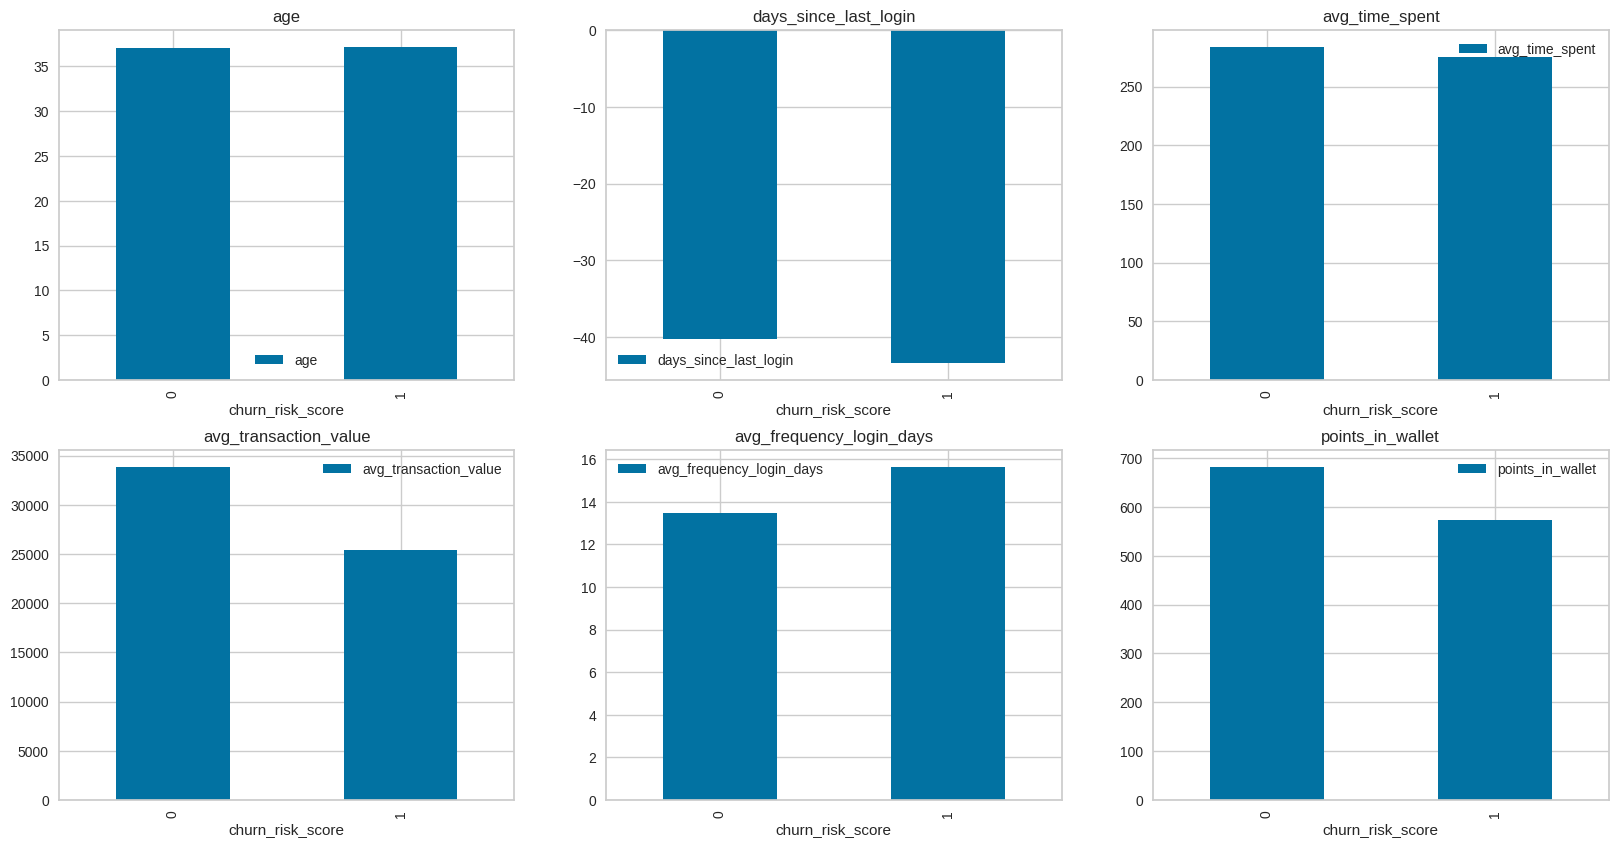

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
df.groupby('churn_risk_score')[['age']].mean().plot(kind='bar',ax=axs[0,0])
axs[0,0].set_title('age')

df.groupby('churn_risk_score')[['days_since_last_login']].mean().plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title('days_since_last_login')

df.groupby('churn_risk_score')[['avg_time_spent']].mean().plot(kind='bar',ax=axs[0, 2])
axs[0, 2].set_title('avg_time_spent')

df.groupby('churn_risk_score')[['avg_transaction_value']].mean().plot(kind='bar',ax=axs[1, 0])
axs[1, 0].set_title('avg_transaction_value')

df.groupby('churn_risk_score')[['avg_frequency_login_days']].mean().plot(kind='bar',ax=axs[1, 1])
axs[1, 1].set_title('avg_frequency_login_days')

df.groupby('churn_risk_score')[['points_in_wallet']].mean().plot(kind='bar',ax=axs[1, 2])
axs[1, 2].set_title('points_in_wallet')

Finding:
- The average transaction value of users in class `0` (not churn) is higher than users in class `1` (churn).

- Points earned by users in class `0` (not churn) are more than class `1` (churn). This is because users in class `0` (not churn) shop more frequently on websites to collect more points.

### 4.5 The comparison number of users based on `gender`

In [ ]:
df.gender.value_counts()

F    18348
M    18298
Name: gender, dtype: int64

<Axes: ylabel='gender'>

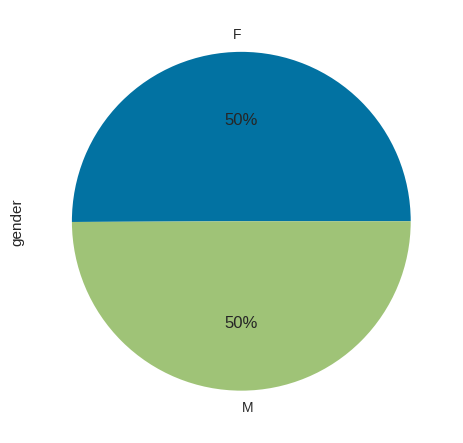

In [ ]:
df.gender.value_counts().plot(kind='pie', autopct='%0.0f%%')

### 4.6 Transaction value based on year (aggregate)

In [ ]:
# df.groupby('joining_date')[['avg_transaction_value']].sum().plot(kind='line',
#                                                                  figsize=(35, 5),
#                                                                  xlabel='joining_date',
#                                                                  ylabel='Transactions Value')

Melihat rentang waktu pada dataset

In [ ]:
df.joining_date.describe()

count                   36646
unique                   1096
top       2015-06-02 00:00:00
freq                       55
first     2015-01-01 00:00:00
last      2017-12-31 00:00:00
Name: joining_date, dtype: object

In [ ]:
# Create a new variable -> year the user made the first transaction.
df['year_joining_date']=pd.to_datetime(df['joining_date']).dt.year

In [ ]:
df.groupby('year_joining_date')[['avg_transaction_value']].aggregate(['sum','count'])

avg_transaction_value       
                                    sum  count
year_joining_date                             
2015                       3.572814e+08  12185
2016                       3.518330e+08  12043
2017                       3.637422e+08  12418

<Axes: xlabel='Year', ylabel='Transaction'>

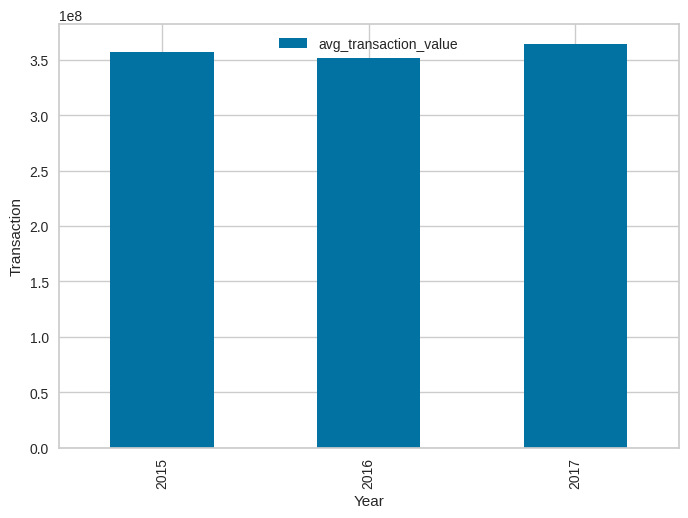

In [ ]:
df.groupby('year_joining_date')[['avg_transaction_value']].sum().plot(kind='bar',
                                                                       xlabel='Year',
                                                                       ylabel='Transaction')

### 4.7 Transaction value based on month (aggregate)

In [ ]:
# Create a new variable -> month the user made the first transaction.
df['month_joining_date'] = pd.to_datetime(df['joining_date']).dt.month

<Axes: xlabel='Month', ylabel='Transaction Value'>

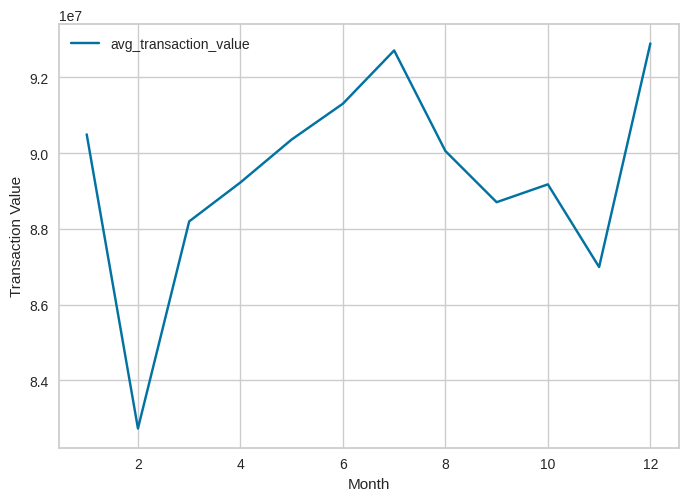

In [ ]:
df.groupby('month_joining_date')[['avg_transaction_value']].sum().plot(kind='line',
                                                                       xlabel='Month',
                                                                       ylabel='Transaction Value')

If all transaction data from 2015-2017 is aggregated by month
- It can be seen that July and December have the highest total transactions compared to other months. This might happen because it coincides with special events, for example, mid-year and year-end discounts, or because there are mid-holidays (summer holidays) and end-of-year holidays (end-of-year holidays), so people make lots of transactions.

### 4.8 Transaction value based on age (aggregate)

In [ ]:
df.groupby('age')[['avg_transaction_value']].mean().sort_values(by='avg_transaction_value',
                                                                ascending=False).head(5)

,avg_transaction_value
age,
27,32052.325046
45,30771.462504
40,30642.961820
41,30306.460405
30,30252.367323


The top 5 user ages that most frequently transact with the company are: 27, 45, 40, 30 and 49.

[Text(0.5, 1.0, 'Churn Risk Score based on Age')]

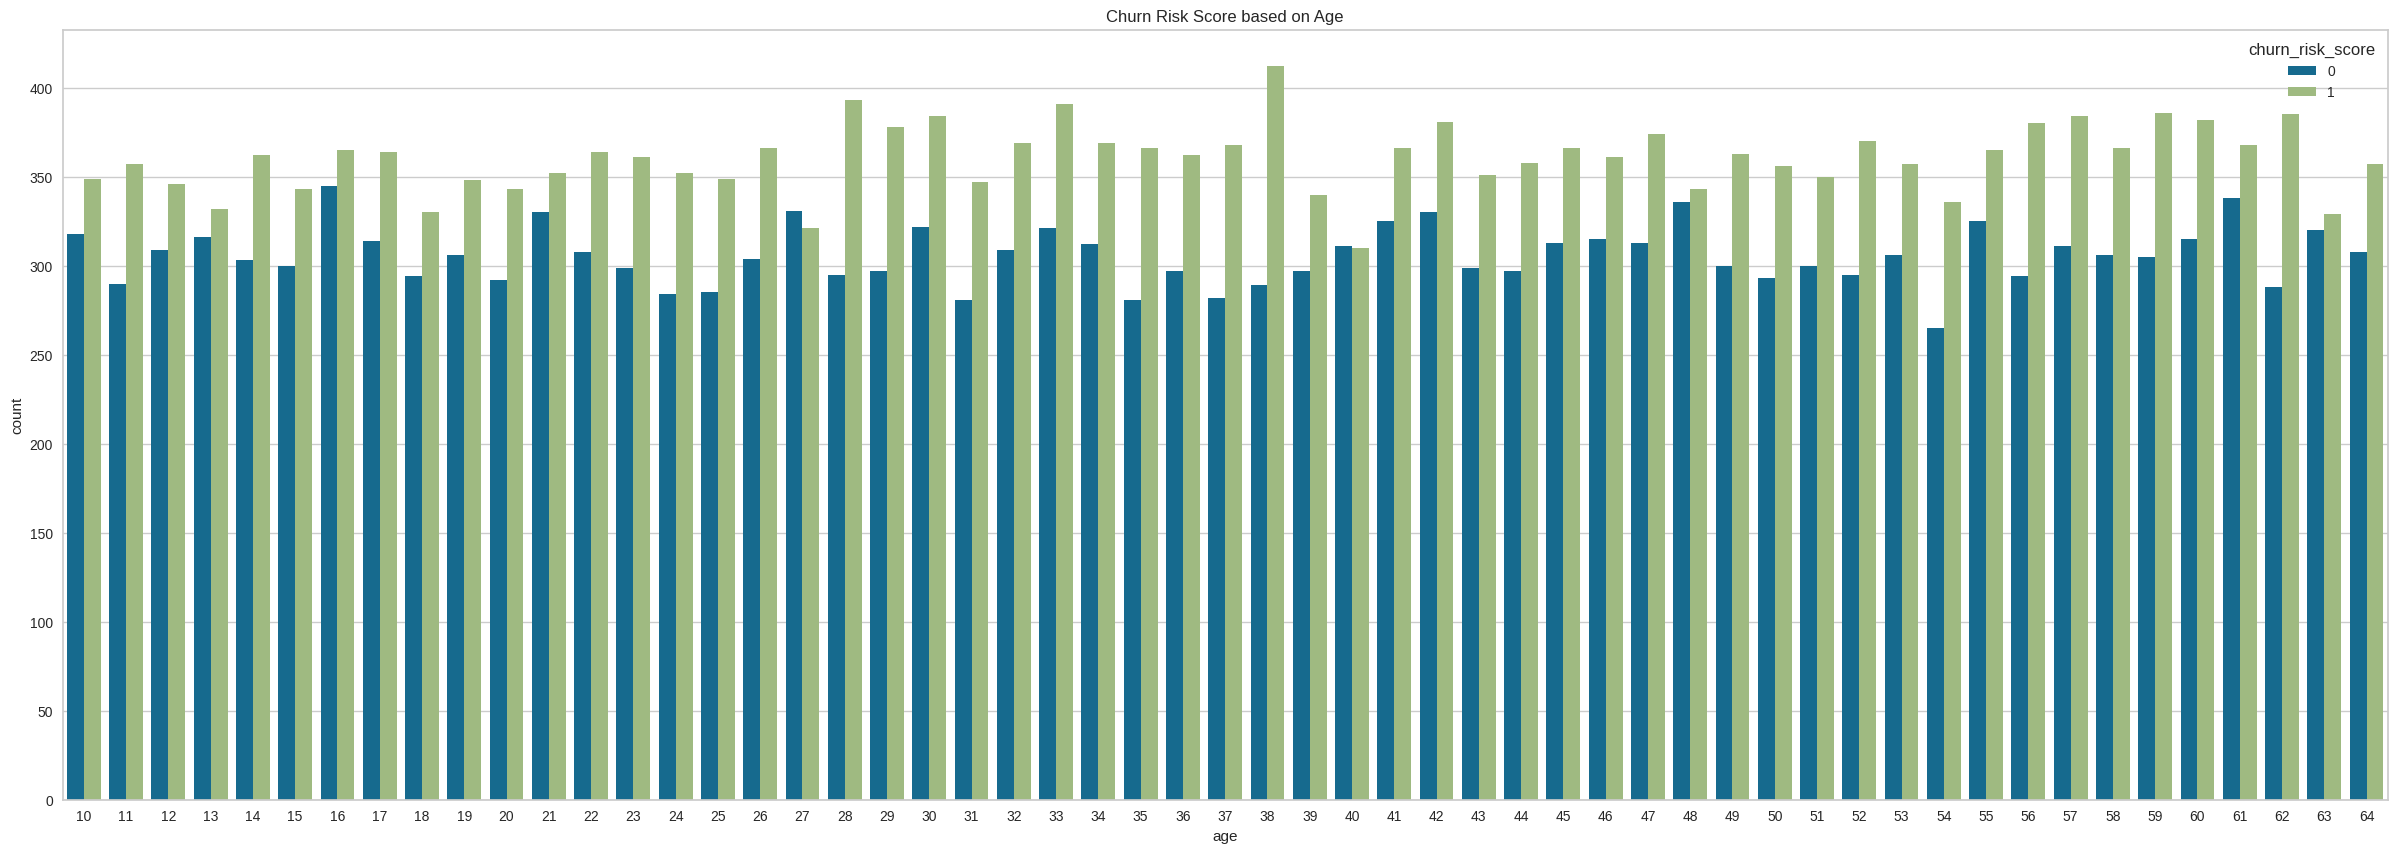

In [ ]:
plt.figure(figsize=[30, 10])
sns.countplot(data=df,
              x='age',
              hue='churn_risk_score').set(title='Churn Risk Score based on Age')

Users aged 27 years and 40 years are users in the age category who have a lower churn value than not churn (this must be maintained).

### 4.9 Subplots for certain variables

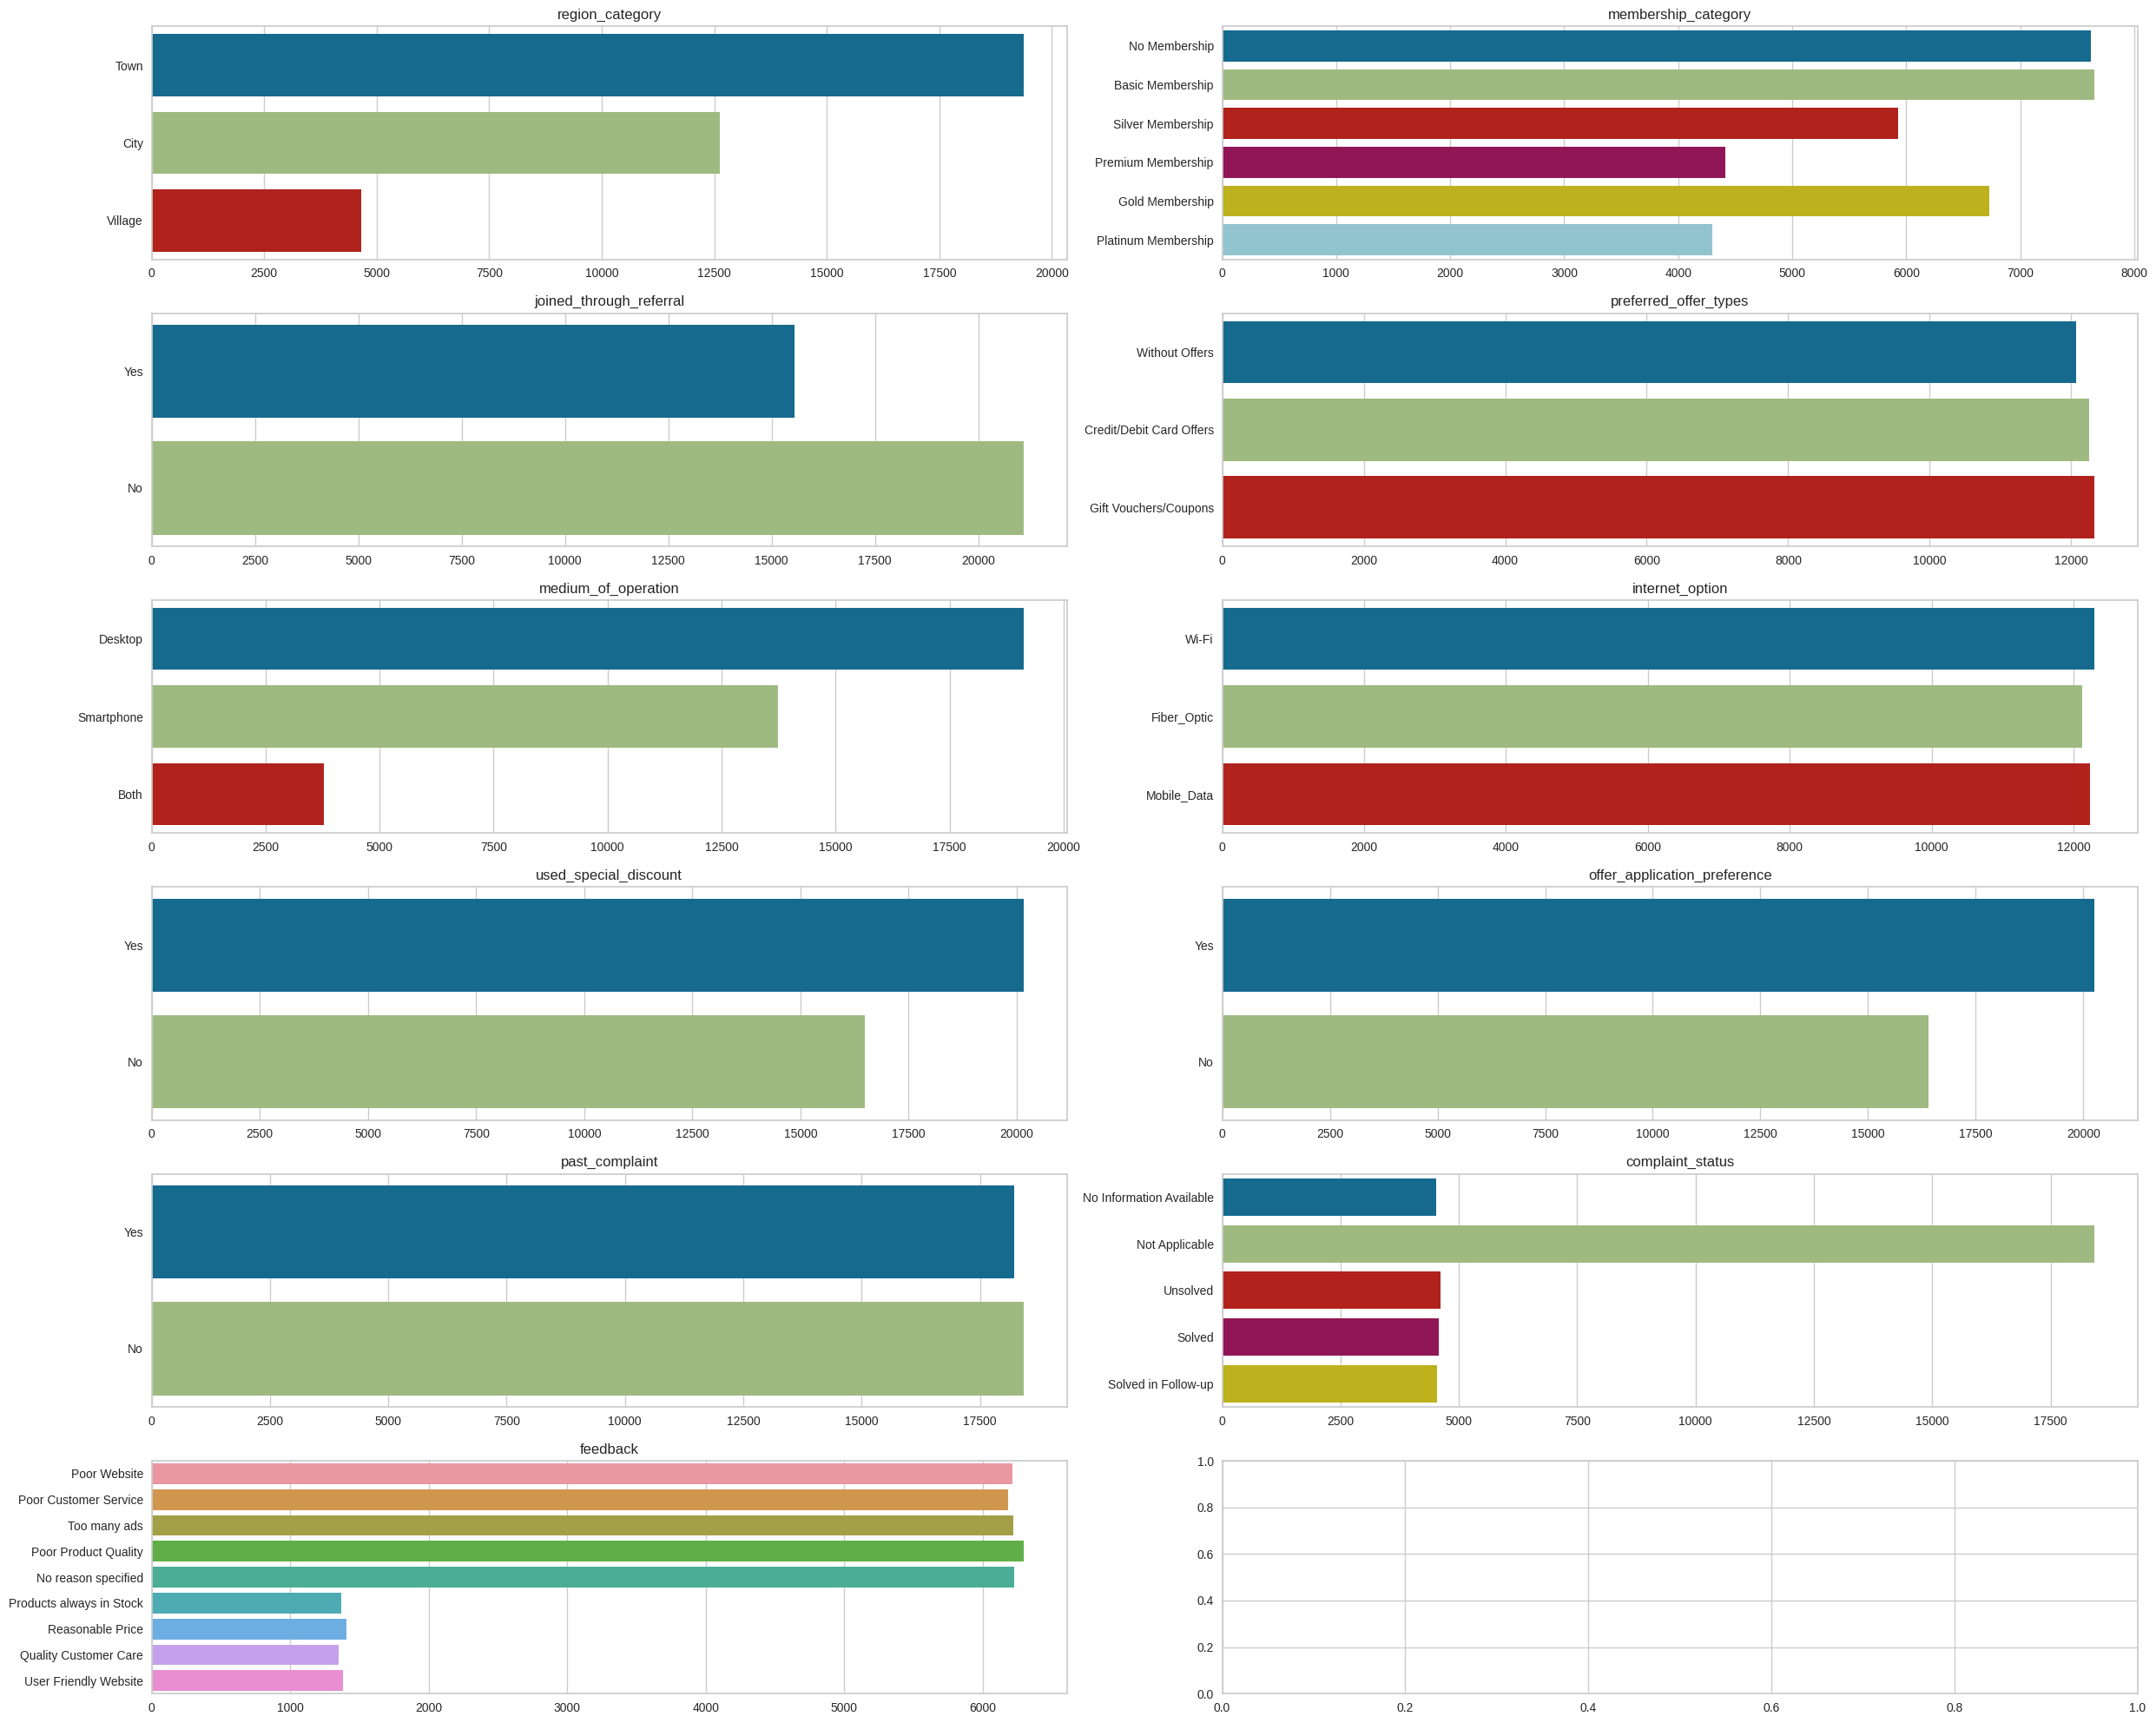

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(25,20))

for i, ax in zip(df[['region_category',
                     'membership_category',
                     'joined_through_referral',
                     'preferred_offer_types',
                     'medium_of_operation',
                     'internet_option',
                     'used_special_discount',
                     'offer_application_preference',
                     'past_complaint',
                     'complaint_status',
                     'feedback']], axes.flatten()):
                     sns.countplot(y=i, data=df, ax=ax)
                     ax.set_title(i)
                     ax.set_xlabel('')
                     ax.set_ylabel('')

plt.tight_layout()
plt.show()

Based on the chart, users' average feedback is mostly negative, such as poor website, poor customer service, too many ads, and poor product quality, even though this company has quite a lot of loyal customers, which can be seen from the number of users at the membership level (Basic, Silver, Premium, Gold, and Platinum) more than the number of users at No Membership.

### 4.10 Points in wallet based on membership category

In [ ]:
# Points in wallet based on membership category
df.groupby('membership_category')[['points_in_wallet']].mean().sort_values(by='points_in_wallet')

,points_in_wallet
membership_category,
No Membership,562.358914
Basic Membership,564.432673
Silver Membership,645.988049
Gold Membership,657.508787
Premium Membership,686.753710
Platinum Membership,688.952893


### 4.11 Descriptive Statistics for Categorical Data that does not churn `0`

In [ ]:
df[df['churn_risk_score']==0][catlist_eda].describe().T

,count,unique,top,freq,first,last
user_id,16819,16819,a6aa19b1580eed4e,1,NaT,NaT
gender,16819,2,M,8443,NaT,NaT
region_category,16819,3,Town,8830,NaT,NaT
membership_category,16819,6,Premium Membership,4416,NaT,NaT
joining_date,16819,1096,2016-01-03 00:00:00,30,2015-01-01,2017-12-31
joined_through_referral,16819,2,No,9936,NaT,NaT
preferred_offer_types,16819,3,Gift Vouchers/Coupons,5959,NaT,NaT
medium_of_operation,16819,3,Desktop,8847,NaT,NaT
internet_option,16819,3,Wi-Fi,5707,NaT,NaT
last_visit_time,16819,15256,17:11:53,4,NaT,NaT


For users who did not churn (`0`), it was found that most were Male (M) and had a Premium Membership level. Then, the most frequently given feedback is related to "Too many ads."

###4.12 Descriptive Statistics for Categorical Data that does churn `1`

In [ ]:
df[df['churn_risk_score']==1][catlist_eda].describe().T

,count,unique,top,freq,first,last
user_id,19827,19827,9f420209e7d129f3,1,NaT,NaT
gender,19827,2,F,9972,NaT,NaT
region_category,19827,3,Town,10537,NaT,NaT
membership_category,19827,4,Basic Membership,7399,NaT,NaT
joining_date,19827,1096,2015-06-02 00:00:00,35,2015-01-01,2017-12-31
joined_through_referral,19827,2,No,11157,NaT,NaT
preferred_offer_types,19827,3,Without Offers,6869,NaT,NaT
medium_of_operation,19827,3,Desktop,10273,NaT,NaT
internet_option,19827,3,Mobile_Data,6632,NaT,NaT
last_visit_time,19827,17690,08:05:14,4,NaT,NaT


For users who churn (`1`), it was found that most were Female (F) and had a Basic Membership level. Then, the most frequently given feedback is related to "Not Applicable"

### 4.13 Correlation

In [ ]:
df2 = df.copy()

In [ ]:
# remove unused variables
df2.drop(['user_id','joining_date','last_visit_time'], axis=1, inplace=True)

In [ ]:
# # determine the correlation between the `churn_risk_score` variable and other variables using the phik matrix

phik_score = df2.phik_matrix().churn_risk_score
phik_score.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'year_joining_date', 'month_joining_date']


churn_risk_score                1.000000
membership_category             0.942304
feedback                        0.455936
points_in_wallet                0.449527
avg_transaction_value           0.408894
avg_frequency_login_days        0.165866
joined_through_referral         0.043545
offer_application_preference    0.029310
preferred_offer_types           0.025768
avg_time_spent                  0.025319
year_joining_date               0.023312
used_special_discount           0.013849
region_category                 0.012242
month_joining_date              0.012124
past_complaint                  0.011981
medium_of_operation             0.010742
complaint_status                0.003034
internet_option                 0.002008
gender                          0.000000
age                             0.000000
days_since_last_login                NaN
Name: churn_risk_score, dtype: float64

Phik (𝜙k) is a new and practical correlation coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient.

- Based on the correlation results from the `phik_score`, the features that are most correlated with the `churn_risk_score` are: `membership_category`.
- The `avg_frequency_login_days` feature will not be used in model building due to irregularities in the EDA process.
- The `gender`, `age`, `days_since_last_login` features will be removed as they are not correlated with the target feature (`avg_frequency_login_days`).


The final features selected are (TOP 4):
- **membership_category**,
- **feedback**,
- **points_in_wallet**,
- **avg_transaction_value**

## 5. Feature Selection

In [ ]:
# Selected Features
df3 = df2.iloc[:,[3,10,12,17,18]]
df3.head(3)

,membership_category,avg_transaction_value,points_in_wallet,feedback,churn_risk_score
0,No Membership,38604.69,627.48,Poor Website,1
1,Basic Membership,7665.66,575.97,Poor Customer Service,1
2,Silver Membership,37671.69,767.93,Too many ads,0


Create a function to get the VIF value -> whether there is multicollinearity between variables.


In [ ]:
# multicollinearity test
def calc_vif(A):
  vif = pd.DataFrame()
  vif["variables"] = A.columns
  vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
  return(vif)

In [ ]:
# check vif score
calc_vif(df3.iloc[:,[1,2]])

,variables,VIF
0,avg_transaction_value,2.523297
1,points_in_wallet,2.523297


- Multicollinearity describes a relationship between variables that causes them to be correlated.

- A variance inflation factor (VIF) is  measure used in regression analysis to assess multicollinearity among predictor variables.

- Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated.


- A VIF of 1 indicates no multicollinearity. This means that the variable is not correlated with other predictors.
- A VIF between 1 and 5 suggests moderate multicollinearity. While it might not be a major concern, it's worth investigating.
- A VIF above 5 indicates high multicollinearity, which can potentially lead to unstable coefficient estimates and reduced interpretability of the individual variables.

a VIF of `avg_transaction_value`= 2.523297 and `points_in_wallet`= 2.523297 are relatively low and generally not a cause for significant concern. It suggests that `avg_transaction_value` and `points_in_wallet` are not strongly correlated with the other predictor variables in our model.

## 6. Data Splitting

In [ ]:
X = df3.drop('churn_risk_score', axis=1)
y = df3['churn_risk_score']

In [ ]:
X

,membership_category,avg_transaction_value,points_in_wallet,feedback
0,No Membership,38604.69,627.48,Poor Website
1,Basic Membership,7665.66,575.97,Poor Customer Service
2,Silver Membership,37671.69,767.93,Too many ads
3,No Membership,15678.14,590.22,Too many ads
4,Silver Membership,8422.68,722.04,Poor Product Quality
...,...,...,...,...
37005,Gold Membership,29455.29,846.52,User Friendly Website
37006,Gold Membership,27038.47,835.98,Reasonable Price
37007,Gold Membership,39305.35,714.90,Poor Customer Service
37008,Gold Membership,46108.73,744.99,Poor Website


In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y_train)

## 7. Check Outliers

In [ ]:
# Separating numeric features and categorical features
numcol = ['avg_transaction_value','points_in_wallet']
catcol = ['membership_category','feedback']

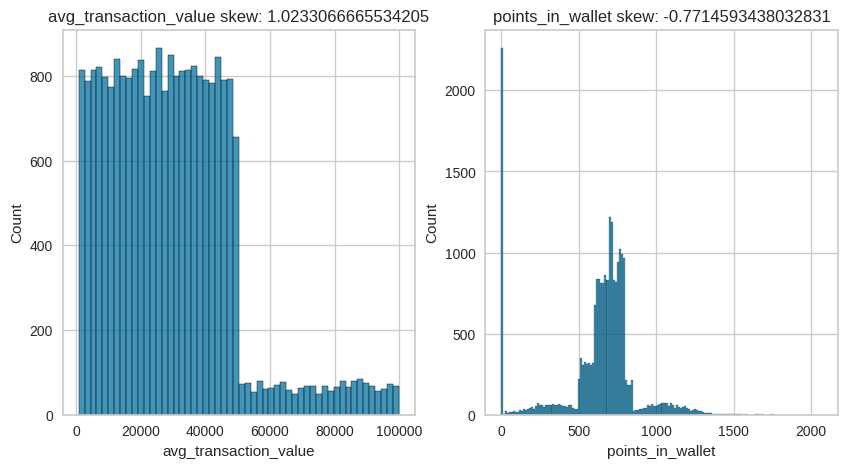

In [ ]:
# Create a histogram to see the distribution of numeric data
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[10,5])

for idx, col in enumerate(numcol):
  sns.histplot(X_train[col], ax=ax[idx])
  ax[idx].set_title(f'{numcol[idx]} skew: {X_train[col].skew()}')

Based on the histogram, it can be seen that the `avg_transaction_value` feature and `points_in_wallet` feature are not normally distributed / there is skewness (normal distribution = skewness between -0.5 and 0.5), so to handle outliers, the 'iqr' capping method will be used next.

In [ ]:
# check for outliers in `avg_transaction_value`

Q1 = X_train['avg_transaction_value'].quantile(.25)
Q3 = X_train['avg_transaction_value'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = X_train[(X_train['avg_transaction_value'] <= lower) | (X_train['avg_transaction_value'] >= upper)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.0 %
upper:  120514.68
lower:  -65576.3125


In `avg_transaction_value` there are no outliers (0%).

In [ ]:
# check for outliers in `points_in_wallet`

Q1 = X_train['points_in_wallet'].quantile(.25)
Q3 = X_train['points_in_wallet'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = X_train[(X_train['points_in_wallet'] <= lower) | (X_train['points_in_wallet'] >= upper)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  10.280573085451135 %
upper:  1304.325
lower:  30.464999999999918


There are outliers in the `points_in_wallet` column of 10.2%, so they will be handled using the capping method = iqr.

## 8. Pipeline for Data Preparation

In [ ]:
# pipeline for handling outliers on numeric variables (`avg_transaction_value` and `points_in_wallet`)
# imputation -> median
# handle outlier -> capping method iqr
# scaler -> MinMaxScaler

num_pipeline = Pipeline([
        ('impute MV', SimpleImputer(strategy='median')),
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
])

num_tr = num_pipeline.fit_transform(X_train[['avg_transaction_value',
                                             'points_in_wallet']])

In [ ]:
# pipeline for encoding the categorical variables (`feedback`) using one hot encoder
# imputation -> most_frequent (mode)

cat_1_pipeline = Pipeline([
    ('imputer_1', SimpleImputer(strategy='most_frequent')),
    ('ohe_enc', OneHotEncoder())
])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['feedback']])

In [ ]:
# pipeline for encoding the categorical variables (`membership_category`) using OrdinalEncoder
# imputation -> most_frequent (mode)

membership_level = ['No Membership',
                    'Basic Membership',
                    'Silver Membership',
                    'Gold Membership',
                    'Premium Membership',
                    'Platinum Membership']

cat_2_pipeline = Pipeline([
    ('imputer_2', SimpleImputer(strategy='most_frequent')),
    ('ordinal_enc', OrdinalEncoder(categories=[membership_level]))
])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[['membership_category']])

In [ ]:
# merging the entire pipeline

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['avg_transaction_value','points_in_wallet']),
    ('cat_ohe', cat_1_pipeline, ['feedback']),
    ('cat_ord', cat_2_pipeline, ['membership_category'])
])

train_tr = full_pipeline.fit_transform(X_train)

In [ ]:
# apply pipelines to validation data and test data
val_tr = full_pipeline.transform(X_val)
test_tr = full_pipeline.transform(X_test)

In [ ]:
val_tr

array([[0.05278499, 0.6017341 , 0.        , ..., 0.        , 1.        ,
        5.        ],
       [0.02314092, 0.5391919 , 1.        , ..., 0.        , 0.        ,
        2.        ],
       [0.10729457, 0.51715652, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12154246, 0.49582764, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06889257, 0.64072583, 0.        , ..., 0.        , 0.        ,
        3.        ],
       [0.35298913, 0.59371124, 0.        , ..., 0.        , 0.        ,
        4.        ]])

In [ ]:
val_tr[1].shape

(12,)

## 9. Pipeline Data

In [ ]:
train_pipe_tf = tf.data.Dataset.from_tensor_slices((train_tr, y_train)).batch(64).repeat(3)
val_pipe_tf = tf.data.Dataset.from_tensor_slices((val_tr, y_val)).batch(64)
test_pipe_tf = tf.data.Dataset.from_tensor_slices((test_tr, y_test)).batch(64)

In [ ]:
# determine the number of neurons in the hidden layer

alp = 10
inp = train_tr.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))

print(f'The number of neurons in the hidden layer: {hid}')

The number of neurons in the hidden layer: 180


## 10. Model Definition

### 10.1 Definition : Sequential

#### 10.1.1 Sequential Model

The sequential model allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other.

In [ ]:
model_seq = Sequential()
model_seq.add(Dense(inp,
                    activation='relu',
                    input_shape=(inp,),
                    kernel_initializer='uniform'))
model_seq.add(Dense(hid,
                    activation='relu',
                    kernel_initializer='uniform'))
model_seq.add(Dense(out,
                    activation='sigmoid',
                    kernel_initializer='uniform'))

In [ ]:
# compile
model_seq.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 180)               2340      
                                                                 
 dense_2 (Dense)             (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


- A rectified linear unit (ReLU) : an activation function that introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue.

- Activation 'sigmoid' : This function takes any real value as input and outputs values in the range of 0 to 1 (binary case).

- The `kernel_initializer` parameter, the value `uniform` indicates that the kernel will be initialized with a uniform distribution.

- Loss = `binary_crossentropy`, used as a loss function for binary classification model.

- Optimizer = `Adam` is an algorithm used in deep learning that helps improve the accuracy of neural networks by adjusting the model's learnable parameters.

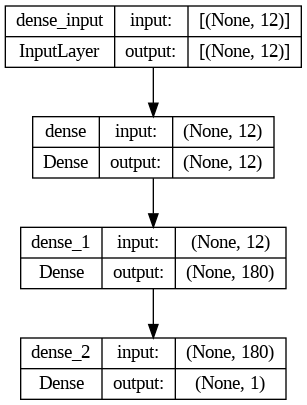

In [ ]:
# plot model sequential
tf.keras.utils.plot_model(model_seq, show_shapes=True)

#### 10.1.2 Sequential Model Tuning

In [ ]:
# Define model for tuning
model_seq_tune = Sequential()
model_seq_tune.add(tf.keras.layers.Dense(inp,
                                         activation='relu',
                                         input_shape=(inp,),
                                         kernel_initializer='random_uniform',
                                         kernel_regularizer='l2'))
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(hid, activation='relu'))
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(50, activation='relu'))
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(10, activation='relu'))
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(out, activation='sigmoid'))

In [ ]:
# compile
model_seq_tune.compile(loss='binary_crossentropy',
                       optimizer='Adam',
                       metrics=['accuracy'])
model_seq_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 180)               2340      
                                                                 
 batch_normalization_1 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 50)                9050      
                                                                 
 batch_normalization_2 (Batc  (None, 50)              

Batch normalization (also known as batch norm) is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.

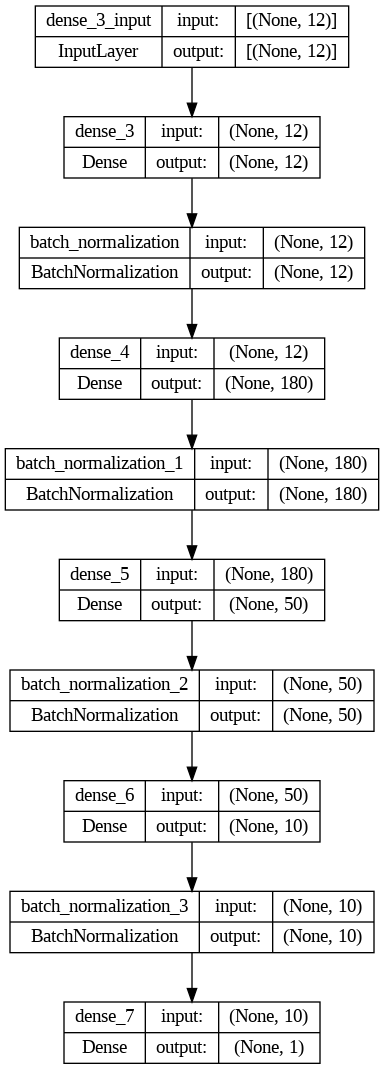

In [ ]:
# plot model sequential tuning
tf.keras.utils.plot_model(model_seq_tune, show_shapes=True)

### 10.2 Definition : Functional

#### 10.2.1 Functional Model

In [ ]:
# define model functional API
input_lyr = tf.keras.layers.Input(shape=(train_tr.shape[1],))
layer1 = tf.keras.layers.Dense(inp,
                               activation='relu',
                               kernel_initializer='random_uniform',
                               kernel_regularizer='l2')(input_lyr)
layer2 = tf.keras.layers.Dense(hid,
                               activation='relu',
                               kernel_initializer='random_uniform')(layer1)
output_lyr = tf.keras.layers.Dense(out,
                                   activation='sigmoid',
                                   kernel_initializer='random_uniform')(layer2)
model_func = tf.keras.models.Model(inputs=input_lyr, outputs=output_lyr)

In [ ]:
# compile
model_func.compile(loss='binary_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 180)               2340      
                                                                 
 dense_10 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


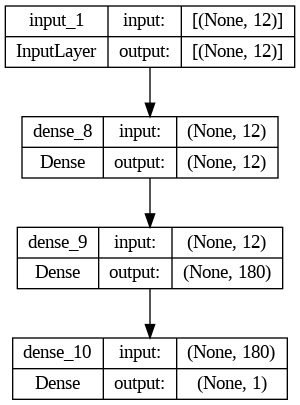

In [ ]:
# plot model
tf.keras.utils.plot_model(model_func,
                          show_shapes=True)

#### 10.2.2 Functional Model (Tuning)

In [ ]:
# define model functional API untuk tuning
input_lyr = tf.keras.layers.Input(shape=(train_tr.shape[1],))
layer1 = tf.keras.layers.Dense(inp,
                               activation='relu',
                               kernel_initializer='random_uniform',
                               kernel_regularizer='l2')(input_lyr)
layer2 = tf.keras.layers.BatchNormalization()(layer1)
layer3 = tf.keras.layers.Dense(hid,
                               activation='relu',
                               kernel_initializer='random_uniform')(layer2)
layer4 = tf.keras.layers.BatchNormalization()(layer3)
layer5 = tf.keras.layers.Dense(50,
                               activation='relu',
                               kernel_initializer='random_uniform')(layer4)
layer6 = tf.keras.layers.BatchNormalization()(layer5)
layer7 = tf.keras.layers.Dense(10,
                               activation='relu',
                               kernel_initializer='random_uniform')(layer6)
layer8 = tf.keras.layers.BatchNormalization()(layer7)
output_lyr = tf.keras.layers.Dense(out,
                                   activation='sigmoid',
                                   kernel_initializer='random_uniform')(layer8)

model_func_tune = tf.keras.models.Model(inputs=input_lyr, outputs=output_lyr)

In [ ]:
# compile
model_func_tune.compile(loss='binary_crossentropy',
                       optimizer='Adam',
                       metrics=['accuracy'])

model_func_tune.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_5 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 50)                9050

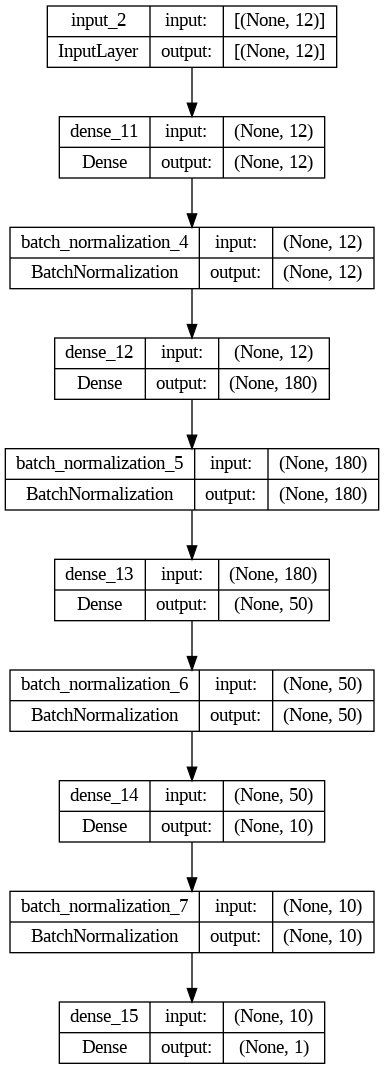

In [ ]:
tf.keras.utils.plot_model(model_func_tune,
                          show_shapes=True)

## 11. Model Training

In [ ]:
# Define earlystopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

- Early stopping is a form of regularization that stops the training process of a neural network before it reaches the maximum number of epochs or iterations.


- monitor = 'val_loss', to use validation loss as performance measure to terminate the training.

- patience = 5, is the number of epochs with no improvement. The value 5 means the training is terminated as soon as the performance measure gets worse from 5 epoch to the next.

- restore_best_weight = True, the model's weights will be restored to the point where the validation performance was best (lowest validation loss) during training.

Below is the training process for the model:
- **sequential**,
- **sequential tuned**,
- **functional API**,
- **functional API tuned**


### 11.1 Training : Sequential



#### 11.1.1 Sequential Model Training

In [ ]:
%%time
train_seq = model_seq.fit(train_pipe_tf,
                          epochs=50,
                          validation_data=val_pipe_tf,
                          callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 12s 5ms/step - loss: 0.3111 - accuracy: 0.8441 - val_loss: 0.2859 - val_accuracy: 0.8465
Epoch 2/50
1101/1101 [==============================] - 9s 8ms/step - loss: 0.2857 - accuracy: 0.8461 - val_loss: 0.2836 - val_accuracy: 0.8462
Epoch 3/50
1101/1101 [==============================] - 7s 6ms/step - loss: 0.2832 - accuracy: 0.8461 - val_loss: 0.2815 - val_accuracy: 0.8462
Epoch 4/50
1101/1101 [==============================] - 6s 5ms/step - loss: 0.2799 - accuracy: 0.8464 - val_loss: 0.2772 - val_accuracy: 0.8467
Epoch 5/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2743 - accuracy: 0.8477 - val_loss: 0.2714 - val_accuracy: 0.8465
Epoch 6/50
1101/1101 [==============================] - 6s 6ms/step - loss: 0.2672 - accuracy: 0.8532 - val_loss: 0.2617 - val_accuracy: 0.8643
Epoch 7/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.2575 - accuracy: 0.8620 - val_loss: 0.2545 - val_accuracy

#### 11.1.2 Sequential Model (Tuning) Training

In [ ]:
%%time
train_seq_tuned = model_seq_tune.fit(train_pipe_tf,
                                     epochs=50,
                                     validation_data=val_pipe_tf,
                                     callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 19s 10ms/step - loss: 0.2568 - accuracy: 0.8801 - val_loss: 0.1988 - val_accuracy: 0.9202
Epoch 2/50
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1924 - accuracy: 0.9205 - val_loss: 0.2207 - val_accuracy: 0.9042
Epoch 3/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1813 - accuracy: 0.9260 - val_loss: 0.2156 - val_accuracy: 0.9089
Epoch 4/50
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1772 - accuracy: 0.9277 - val_loss: 0.1684 - val_accuracy: 0.9320
Epoch 5/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1748 - accuracy: 0.9292 - val_loss: 0.1693 - val_accuracy: 0.9308
Epoch 6/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1732 - accuracy: 0.9296 - val_loss: 0.1685 - val_accuracy: 0.9337
Epoch 7/50
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1723 - accuracy: 0.9302 - val_loss: 0.1717 - va

### 11.2 Training : Functional

#### 11.2.1 Functional Model Training

In [ ]:
%%time
train_func = model_func.fit(train_pipe_tf,
                            epochs=50,
                            validation_data=val_pipe_tf,
                            callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 8s 6ms/step - loss: 0.3188 - accuracy: 0.8442 - val_loss: 0.2942 - val_accuracy: 0.8465
Epoch 2/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2934 - accuracy: 0.8458 - val_loss: 0.2920 - val_accuracy: 0.8462
Epoch 3/50
1101/1101 [==============================] - 6s 5ms/step - loss: 0.2913 - accuracy: 0.8458 - val_loss: 0.2901 - val_accuracy: 0.8467
Epoch 4/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.2892 - accuracy: 0.8462 - val_loss: 0.2877 - val_accuracy: 0.8465
Epoch 5/50
1101/1101 [==============================] - 6s 6ms/step - loss: 0.2862 - accuracy: 0.8466 - val_loss: 0.2848 - val_accuracy: 0.8469
Epoch 6/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2826 - accuracy: 0.8472 - val_loss: 0.2809 - val_accuracy: 0.8469
Epoch 7/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2788 - accuracy: 0.8481 - val_loss: 0.2769 - val_accuracy:

#### 11.2.2 Functional Model (Tuning) Training

In [ ]:
%%time
train_func_tuned = model_func_tune.fit(train_pipe_tf,
                                       epochs=50,
                                       validation_data=val_pipe_tf,
                                       callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 19s 12ms/step - loss: 0.2677 - accuracy: 0.8827 - val_loss: 0.2601 - val_accuracy: 0.8924
Epoch 2/50
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1917 - accuracy: 0.9193 - val_loss: 0.1765 - val_accuracy: 0.9265
Epoch 3/50
1101/1101 [==============================] - 13s 12ms/step - loss: 0.1843 - accuracy: 0.9236 - val_loss: 0.1689 - val_accuracy: 0.9297
Epoch 4/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1812 - accuracy: 0.9253 - val_loss: 0.2056 - val_accuracy: 0.9105
Epoch 5/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1793 - accuracy: 0.9264 - val_loss: 0.1702 - val_accuracy: 0.9275
Epoch 6/50
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1775 - accuracy: 0.9276 - val_loss: 0.1752 - val_accuracy: 0.9274
Epoch 7/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1766 - accuracy: 0.9275 - val_loss: 0.1672 - v

## 12. Model Evaluation

### 12.1 Evaluation : Sequential

#### 12.1.1 Sequential Model Evaluation

In [ ]:
history_seq_df = pd.DataFrame(train_seq.history)

<Axes: >

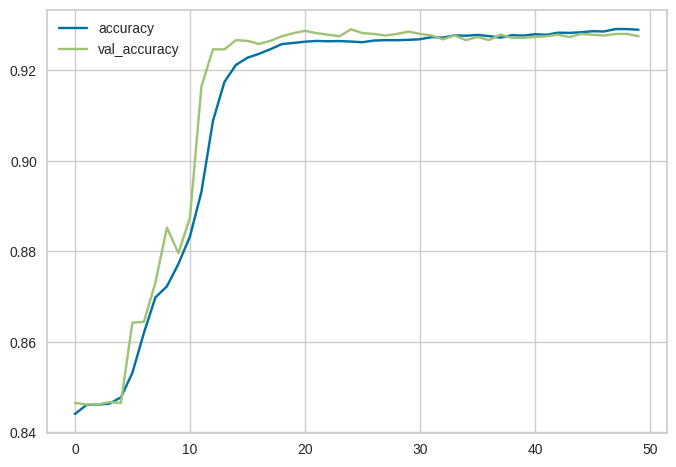

In [ ]:
history_seq_df[['accuracy',
                'val_accuracy']].plot()

<Axes: >

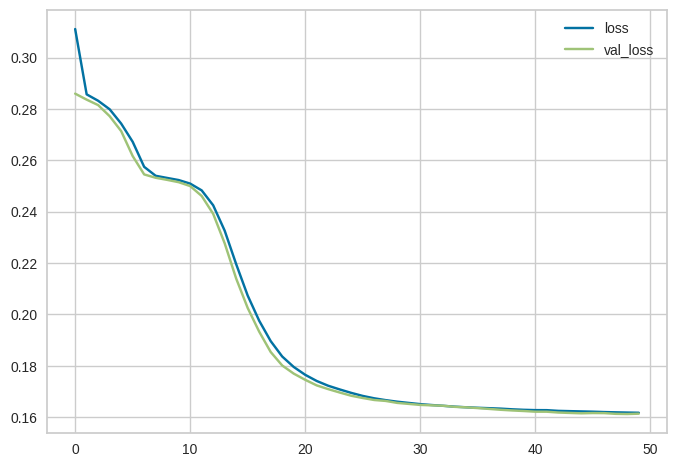

In [ ]:
history_seq_df[['loss', 'val_loss']].plot()

In [ ]:
y_pred_seq = model_seq.predict(test_tr)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_seq))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3364
           1       0.93      0.93      0.93      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'True Label')

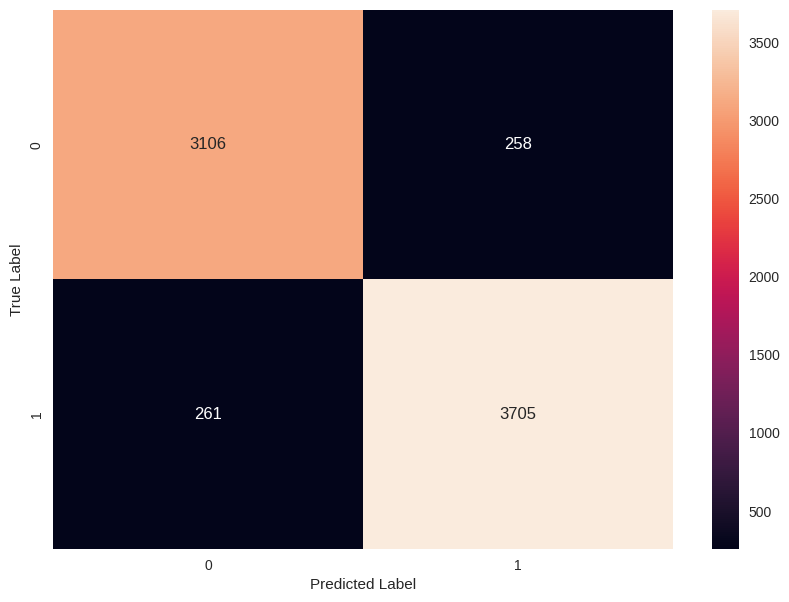

In [ ]:
cm_seq = tf.math.confusion_matrix(labels=y_test,
                                  predictions=y_pred_seq)
plt.figure(figsize=(10,7))
sns.heatmap(cm_seq, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#### 12.1.2 Sequential Model (Tuning)Evaluation

In [ ]:
history_seq_tuned_df = pd.DataFrame(train_seq_tuned.history)

<Axes: >

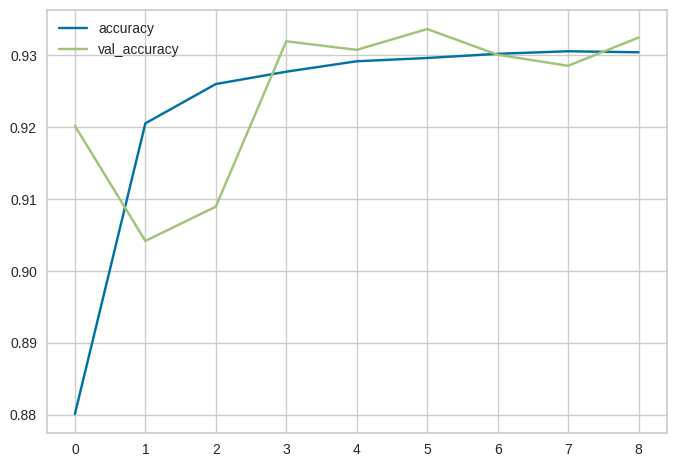

In [ ]:
history_seq_tuned_df[['accuracy','val_accuracy']].plot()

<Axes: >

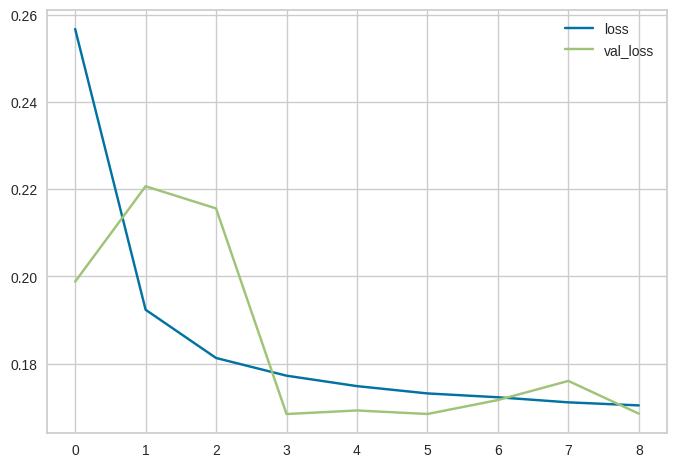

In [ ]:
history_seq_tuned_df[['loss','val_loss']].plot()

In [ ]:
y_pred_seq_tuned = model_seq_tune.predict(test_tr)


230/230 [==============================] - 1s 2ms/step


### 12.2 Evaluation : Functional

#### 12.2.1 Functional Model Evaluation

In [ ]:
history_func_df = pd.DataFrame(train_func.history)

<Axes: >

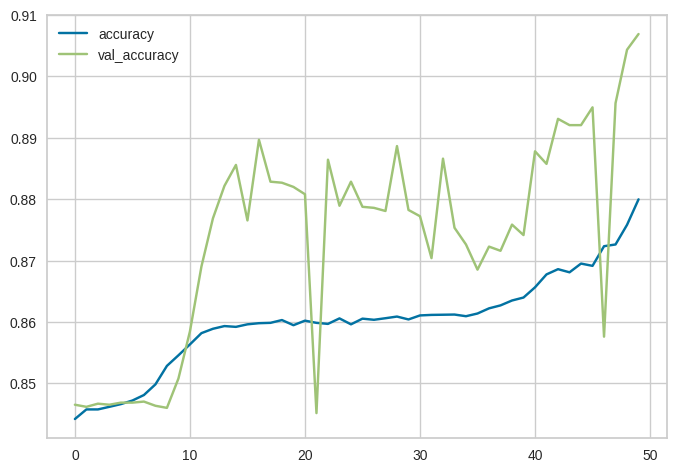

In [ ]:
history_func_df[['accuracy','val_accuracy']].plot()

<Axes: >

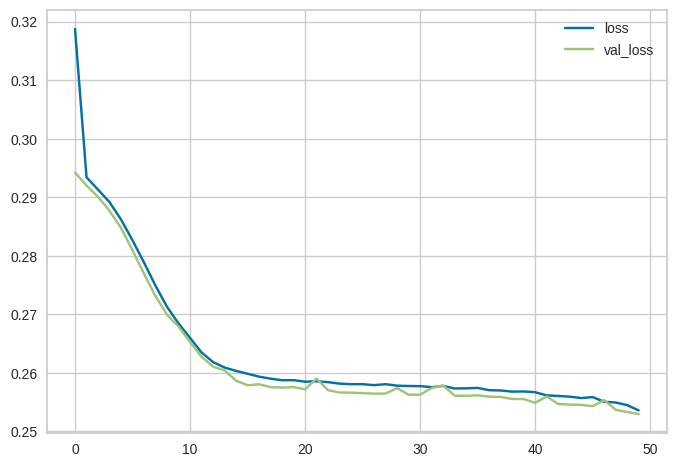

In [ ]:
history_func_df[['loss','val_loss']].plot()

In [ ]:
y_pred_func = model_func.predict(test_tr)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_func))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3364
           1       0.88      0.94      0.91      3966

    accuracy                           0.90      7330
   macro avg       0.90      0.90      0.90      7330
weighted avg       0.90      0.90      0.90      7330



Text(95.72222222222221, 0.5, 'True Label')

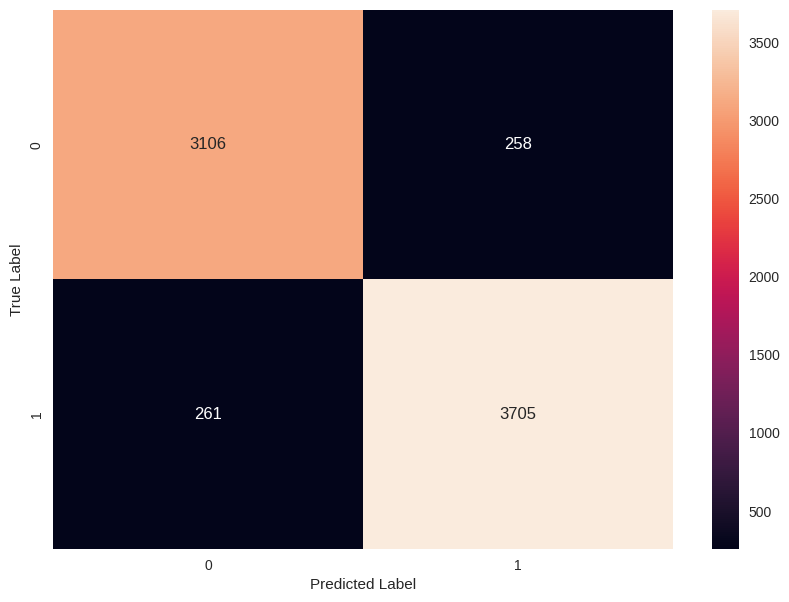

In [ ]:
cm_func = tf.math.confusion_matrix(labels=y_test,
                                   predictions=y_pred_func)
plt.figure(figsize=(10,7))
sns.heatmap(cm_seq, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#### 12.2.2 Functional Model (Tuning) Evaluation

In [ ]:
history_func_tuned_df = pd.DataFrame(train_func_tuned.history)

<Axes: >

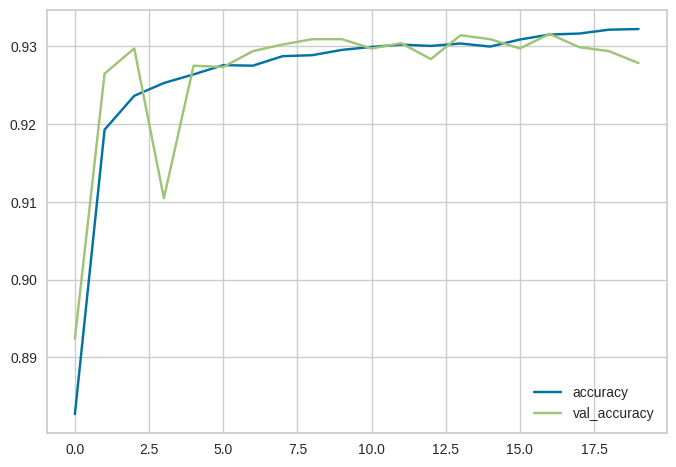

In [ ]:
history_func_tuned_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

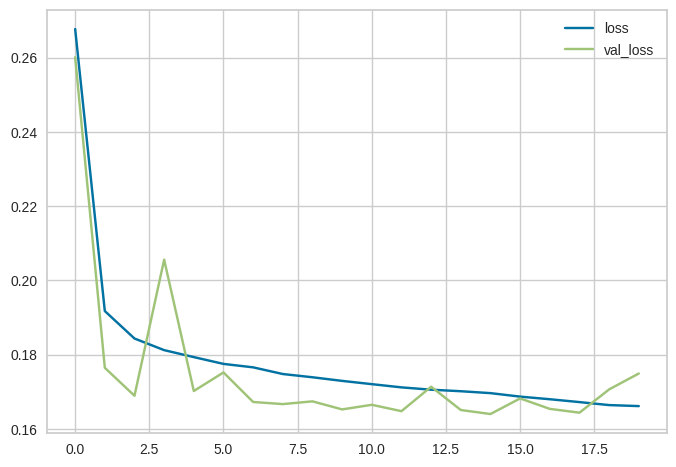

In [ ]:
history_func_tuned_df[['loss', 'val_loss']].plot()

In [ ]:
y_pred_func_tuned = model_func_tune.predict(test_tr)
y_pred_func_tuned = np.where(y_pred_func_tuned >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tuned))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3364
           1       0.91      0.96      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'True Label')

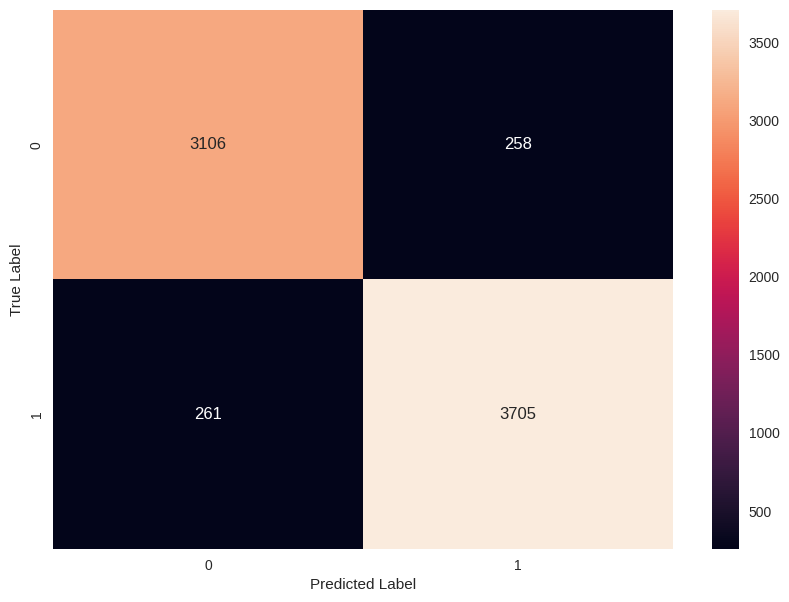

In [ ]:
cm_func_tuned = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tuned)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")